# Pymaceuticals Inc.
---

### Analysis
 Conclusion: 
    What we can take after getting all the data is that Capomulin and Ramicane is working better 
    in lowering the size of the tumors compared to the rest of the drugs. Ramicane being the most effective.
    
    From the boxplot we can see that infubinol and Ceftamin are the least effective. With their final tumor
    volume being the biggest.

    With the linegraph it helps show the effectiveness of Capomulin with using it on a specific mouse (mouse l509).
    It showed the drop of the tumor volume throughtout the days with its peak tumor volume of 48.070452 at day 20,
    and the lowest tumor volume of 40.207288 at day 35.

    

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_merge = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
mouse_study_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_study_merge['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = mouse_study_merge.loc[mouse_study_merge.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
mice_duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_id_dupe = mouse_study_merge.loc[mouse_study_merge['Mouse ID'] == "g989", :]
mice_id_dupe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_merge.loc[mouse_study_merge['Mouse ID']!= mice_duplicate[0]]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_vol_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_vol_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_vol_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_vol_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_vol_mean,
    "Median Tumor Volume": tumor_vol_median,
    "Tumor Volume Variance": tumor_vol_var,
    "Tumor Volume Std. Dev.": tumor_vol_std,
    "Tumor Volume Std. Err.": tumor_vol_sem
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
mice_count = clean_df['Drug Regimen'].value_counts()

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

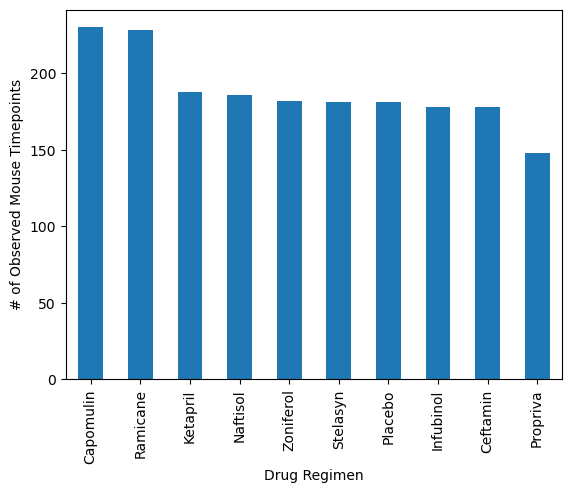

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.



panda_bar = mice_count.plot(kind='bar')
panda_bar.set_xlabel('Drug Regimen')
panda_bar.set_ylabel('# of Observed Mouse Timepoints')

panda_bar

/var/folders/4y/wsdg_06j0cq7lh5zxh8rt4vc0000gn/T/ipykernel_53516/1380393843.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_axis, ha= 'right',rotation=90)


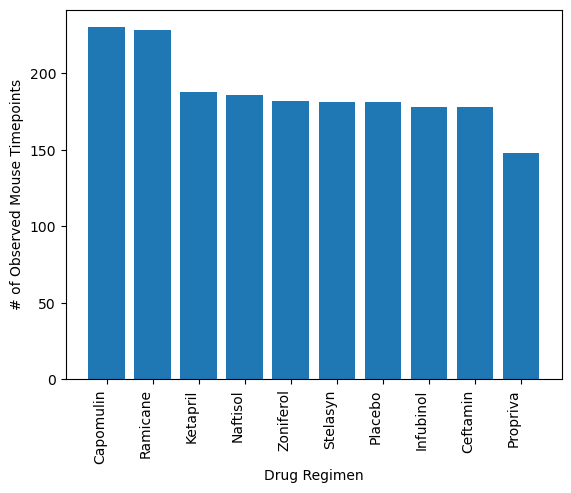

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

fig, ax = plt.subplots()
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')
ax.set_xticklabels(x_axis, ha= 'right',rotation=90)
ax.bar(x_axis, y_axis)

plt.show()

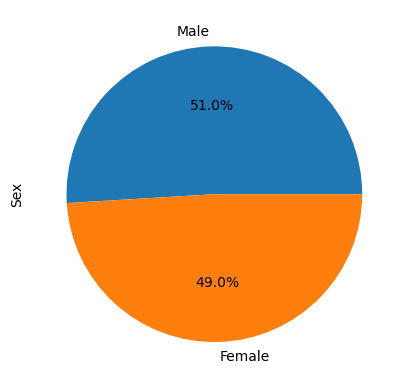

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = clean_df['Sex'].value_counts()
male_vs_female.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('Sex')

plt.show()


([<matplotlib.patches.Wedge at 0x16de1bd90>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

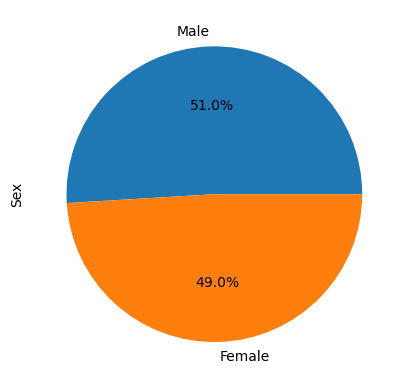

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
fig, ax = plt.subplots()
ax.set_ylabel('Sex')
ax.pie(clean_df['Sex'].value_counts(),labels=labels, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
final_tumor = final_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_data = final_tumor.merge(clean_df, on=['Mouse ID', 'Timepoint'], how= 'left')


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for drug in treatment_list:
    final_tumor_vol = merge_data.loc[merge_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lower_quart = quartiles[.25]
    upper_quart = quartiles[.75]
    iqr = upper_quart - lower_quart
    lower_bound = lower_quart - (1.5 * iqr)
    upper_bound = upper_quart + (1.5 * iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(final_tumor_vol.quantile(.25))
    print(f"{drug}'s potential outliers: {outliers}")
    



32.37735684
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
31.56046955
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
54.04860769
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
48.72207785
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


{'whiskers': [<matplotlib.lines.Line2D at 0x16df3a740>,
 'caps': [<matplotlib.lines.Line2D at 0x16df3ab90>,
 'boxes': [<matplotlib.lines.Line2D at 0x16df3a4a0>,
 'medians': [<matplotlib.lines.Line2D at 0x16df3b0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x16df3b370>,
 'means': []}

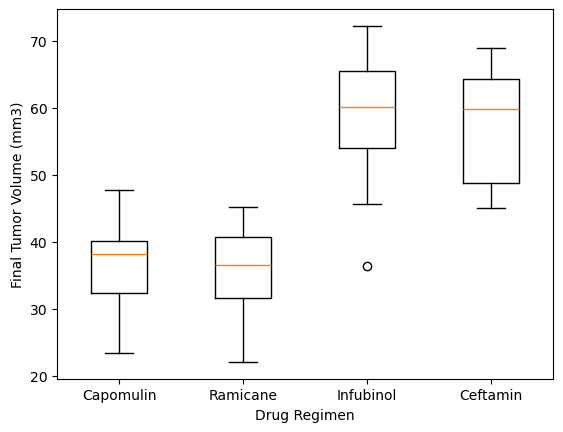

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
ax.boxplot(tumor_vol_list, labels= treatment_list)

## Line and Scatter Plots

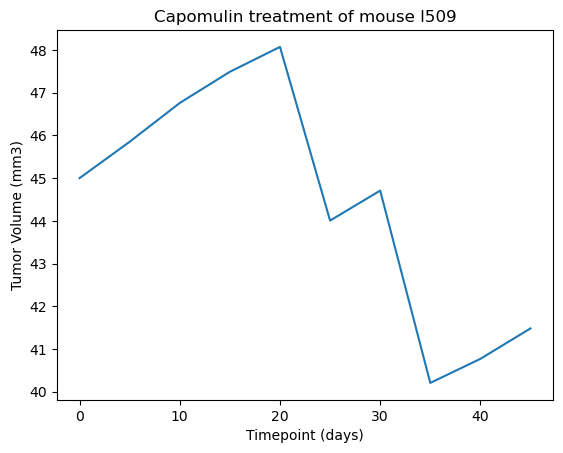

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', :]

mouse_line = capomulin_mice.loc[capomulin_mice['Mouse ID'] == 'l509', :]
x_axis = mouse_line['Timepoint']
size = mouse_line['Tumor Volume (mm3)']

fig, ax = plt.subplots()
ax.set_title('Capomulin treatment of mouse l509')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Timepoint (days)')
ax.plot(x_axis, size, label= 'Fareneit')


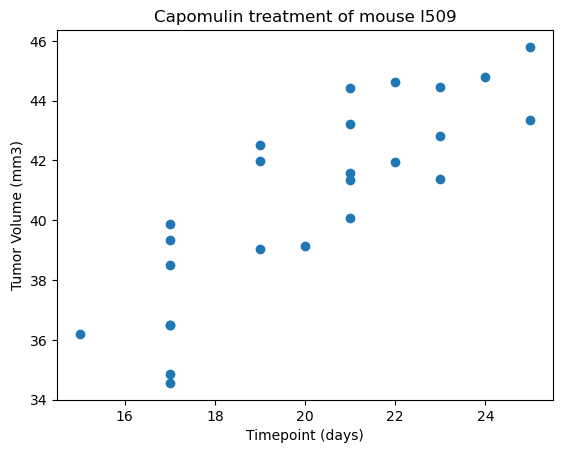

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight = capomulin_mice.groupby('Mouse ID')['Weight (g)'].mean()
mouse_ave_tumor = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

fig, ax = plt.subplots()
ax.set_title('Capomulin treatment of mouse l509')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Timepoint (days)')
ax.scatter(mouse_weight, mouse_ave_tumor)

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


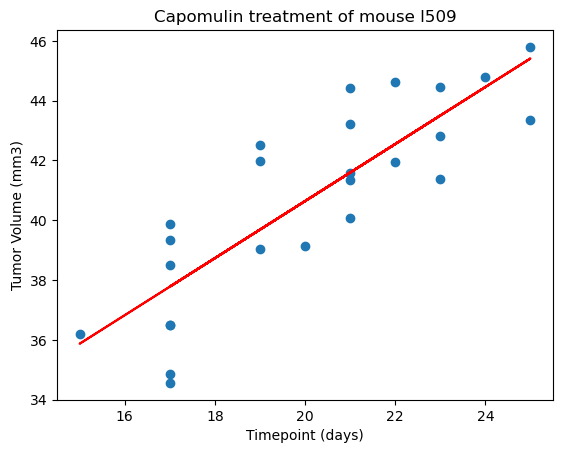

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, r, p, se = st.linregress(mouse_weight, mouse_ave_tumor)

fig, ax = plt.subplots()
ax.set_title('Capomulin treatment of mouse l509')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Timepoint (days)')
ax.scatter(mouse_weight, mouse_ave_tumor)
ax.plot(mouse_weight, slope * mouse_weight + intercept, color= 'red')

print(f'The correlation between mouse weight and the average tumor volume is: {r.round(2)}')